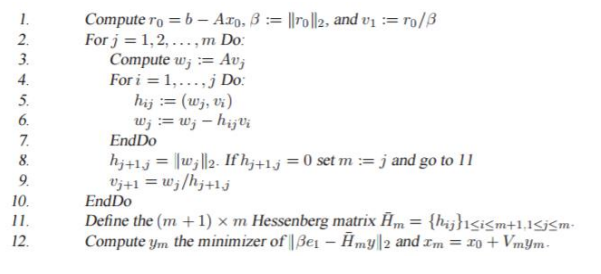

In [61]:
import numpy as np

In [62]:
def my_gmres(A, b, n_iter):
    n = b.shape[0]
    x0 = np.zeros(n) 
    H = np.zeros((n_iter + 1, n_iter))
    r0 = b - A @ x0 
    beta = np.linalg.norm(r0)
    V = np.zeros((n_iter + 1, n))
    V[0] = r0 / beta

    for j in range(n_iter):
        w = A @ V[j]

        for i in range(j + 1):
            H[i, j] = np.dot(w, V[i])
            w -= H[i, j] * V[i]
        H[j + 1, j] = np.linalg.norm(w)

        V[j + 1] = w / H[j + 1, j]

    e1 = np.zeros(n_iter + 1)
    e1[0] = beta
    y = np.linalg.lstsq(H, e1, rcond=None)[0]

    x_new = x0 + V[:-1].T @ y
    return x_new

In [63]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import gmres

In [67]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1], dtype=float)

In [70]:
x, exitCode = gmres(A, b)
x = my_gmres(A, b, 50)

C:\Users\Maksim\AppData\Local\Temp\ipykernel_3288\2882607723.py:22: RuntimeWarning: invalid value encountered in divide
  V[j + 1] = w / H[j + 1, j]


LinAlgError: SVD did not converge in Linear Least Squares

In [71]:
np.allclose(A.dot(x), b)

True